In [1]:
import math
import random

In [2]:
def dist(x):
    return math.e**(-0.5 * x**2)

In [3]:
def normedDist(x):
    return math.e**(-0.5 * x**2) / math.sqrt(math.pi * 2)

In [4]:
def propose(x0, delta):
    return random.random() * 2 * delta + x0 - delta

In [5]:
def randomSeq(delta, length):
    x0 = 0
    series = [x0]
    while len(series) < length:
        x1 = propose(x0, delta)
        if random.random() < min(1, dist(x1) / dist(x0)):
            x0 = x1
        series.append(x0)
    return series

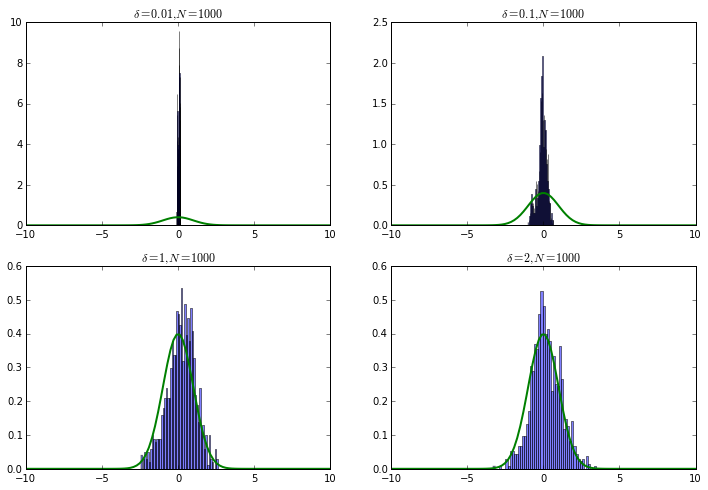

In [13]:
fig = plt.figure()
fig.set_size_inches(12,8)
ax1 = fig.add_subplot(221)
ax1.hist(randomSeq(0.01,1000), normed=True, bins=50, alpha=0.5)
ax1.plot(np.linspace(-10, 10, 100), map(normedDist, np.linspace(-10, 10, 100)), linewidth=2)
ax1.set_title("$\delta=0.01,N=1000$")

ax2 = fig.add_subplot(222)
ax2.hist(randomSeq(0.1,1000), normed=True, bins=50, alpha=0.5)
ax2.plot(np.linspace(-10, 10, 100), map(normedDist, np.linspace(-10, 10, 100)), linewidth=2)
ax2.set_title("$\delta=0.1,N=1000$")

ax3 = fig.add_subplot(223)
ax3.hist(randomSeq(1,1000), normed=True, bins=50, alpha=0.5)
ax3.plot(np.linspace(-10, 10, 100), map(normedDist, np.linspace(-10, 10, 100)), linewidth=2)
ax3.set_title("$\delta=1,N=1000$")

ax4 = fig.add_subplot(224)
ax4.hist(randomSeq(2,1000), normed=True, bins=50, alpha=0.5)
ax4.plot(np.linspace(-10, 10, 100), map(normedDist, np.linspace(-10, 10, 100)), linewidth=2)
ax4.set_title("$\delta=2,N=1000$")

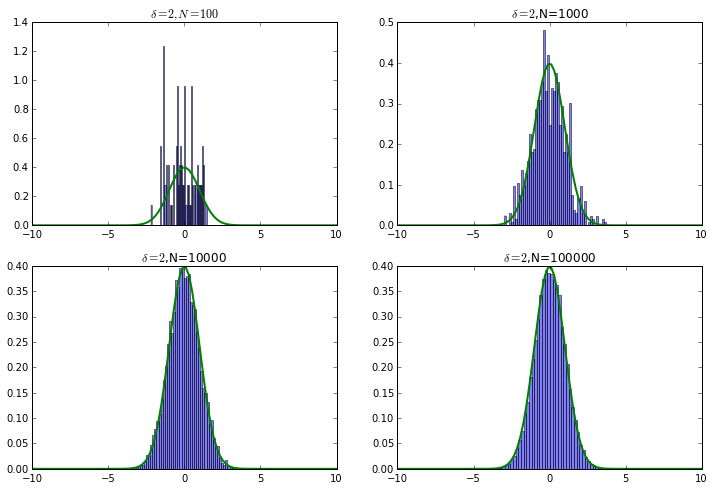

In [17]:
fig2 = plt.figure()
fig2.set_size_inches(12,8)
ax21 = fig2.add_subplot(221)
ax21.hist(randomSeq(2,100), normed=True, bins=50, alpha=0.5)
ax21.plot(np.linspace(-10, 10, 100), map(normedDist, np.linspace(-10, 10, 100)), linewidth=2)
ax21.set_title("$\delta=2,N=100$")

ax22 = fig2.add_subplot(222)
ax22.hist(randomSeq(2,1000), normed=True, bins=50, alpha=0.5)
ax22.plot(np.linspace(-10, 10, 100), map(normedDist, np.linspace(-10, 10, 100)), linewidth=2)
ax22.set_title("$\delta=2$,N=1000")

ax23 = fig2.add_subplot(223)
ax23.hist(randomSeq(2,10000), normed=True, bins=50, alpha=0.5)
ax23.plot(np.linspace(-10, 10, 100), map(normedDist, np.linspace(-10, 10, 100)), linewidth=2)
ax23.set_title("$\delta=2$,N=10000")

ax24 = fig2.add_subplot(224)
ax24.hist(randomSeq(2,100000), normed=True, bins=50, alpha=0.5)
ax24.plot(np.linspace(-10, 10, 100), map(normedDist, np.linspace(-10, 10, 100)), linewidth=2)
ax24.set_title("$\delta=2$,N=100000")

In [141]:
def autoCorrelation(seq, k, var):
    n = len(seq)
    var = np.var(seq)
    seq = seq - np.mean(seq)
    return (seq[:n-k] * seq[-(n-k):]).mean() / var

In [142]:
def sweepDelta(delta):
    length = int(2e6)
    seq = randomSeq(delta, length)
    var = np.var(seq)
    for i in range(2000):
        if abs(correlation(seq, i, var)) < 0.01:
            break
    with open("sweep.txt", "a") as f:
        f.write("%f %d\n" % (delta, i))

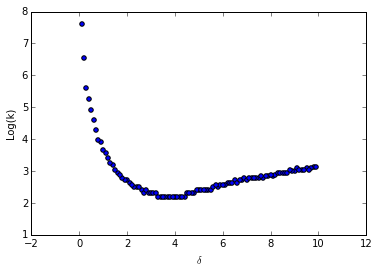

In [20]:
sweep = np.loadtxt("./code/sweep.txt")
fig3 = plt.figure()
ax = fig3.add_subplot(111)
ax.scatter(sweep[:,0], np.log(sweep[:,1]))
ax.set_xlabel("$\delta$")
ax.set_ylabel("Log(k)")

In [157]:
def metroIntegrate(length):
    seq = randomSeq(3, length)
    result = []
    for x in seq:
        result.append(x**2 * dist(x) / normedDist(x))
    return np.mean(result)

In [146]:
def randomIntegrate(num, lim):
    result = []
    for i in range(num):
        x = random.random() * 2 * lim - lim
        result.append(x**2 * math.e**(-0.5 * x**2) * 2 * lim)
    return np.mean(result)

In [191]:
metropolis = []
randomint = []
for i in range(1000):
    metropolis.append(metroIntegrate(10000))
    randomint.append(randomIntegrate(10000, 10))

In [177]:
therotical_value = math.sqrt(math.pi * 2)
print therotical_value

2.50662827463


In [195]:
print abs(np.mean(metropolis) - therotical_value)
print abs(np.mean(randomint) - therotical_value)

9.2587214533e-05
0.000965255721303


In [193]:
print np.var(metropolis)
print np.var(randomint)

0.00458686887602
0.00213343165447
